Saving sample 6.jpg.png to sample 6.jpg.png
Level 0 - Original


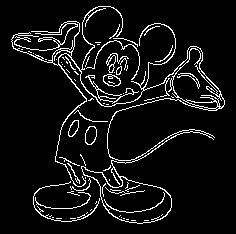

Level 1 - Half Size


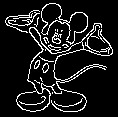

Level 2 - Quarter Size


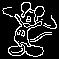

Level 3 - One-Eighth Size


In [1]:
# ==============================
# Activity 1: Gaussian Pyramid
# ==============================

!pip install opencv-python-headless -q

import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read & convert to grayscale
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian Pyramid
level0 = gray
level1 = cv2.pyrDown(level0)
level2 = cv2.pyrDown(level1)
level3 = cv2.pyrDown(level2)

# Edge Detection
edge0 = cv2.Canny(level0, 100, 200)
edge1 = cv2.Canny(level1, 100, 200)
edge2 = cv2.Canny(level2, 100, 200)
edge3 = cv2.Canny(level3, 100, 200)

# Display
print("Level 0 - Original")
cv2_imshow(edge0)

print("Level 1 - Half Size")
cv2_imshow(edge1)

print("Level 2 - Quarter Size")
cv2_imshow(edge2)

print("Level 3 - One-Eighth Size")
cv2_imshow(edge3)


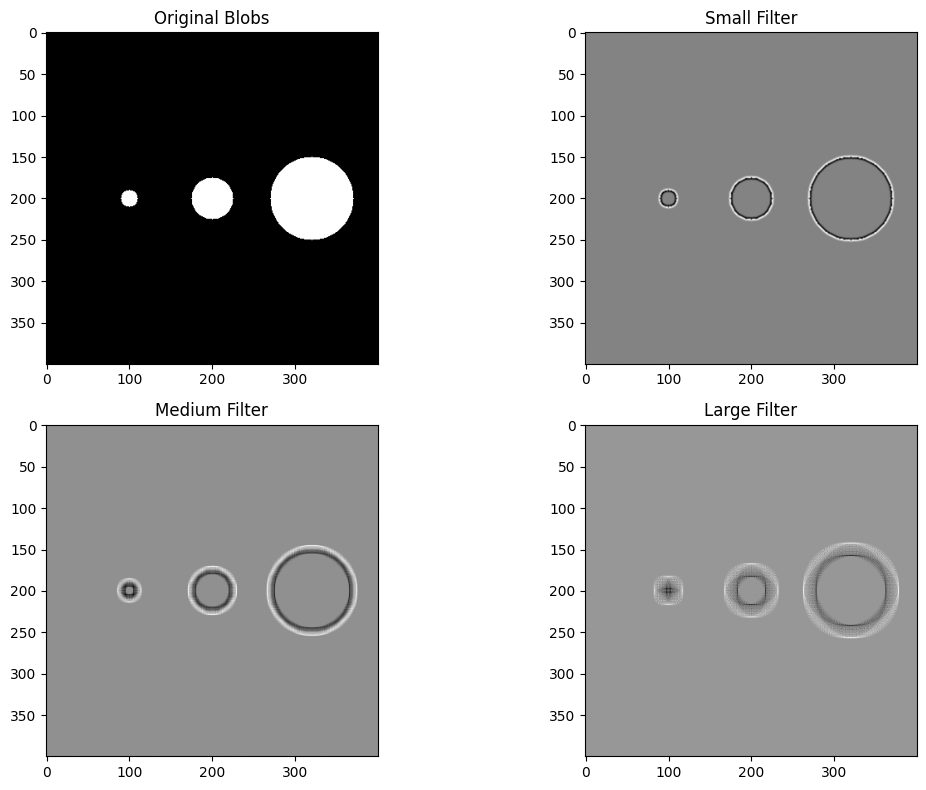

In [2]:
# ==============================
# Activity 2: Blob Scale Matching
# ==============================

!pip install opencv-python-headless matplotlib -q

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic image
img = np.zeros((400, 400), dtype=np.uint8)

# Draw blobs
cv2.circle(img, (100, 200), 10, 255, -1)   # Small
cv2.circle(img, (200, 200), 25, 255, -1)   # Medium
cv2.circle(img, (320, 200), 50, 255, -1)   # Large

# LoG filters
blur1 = cv2.GaussianBlur(img, (5,5), 1)
log1 = cv2.Laplacian(blur1, cv2.CV_64F)

blur2 = cv2.GaussianBlur(img, (9,9), 3)
log2 = cv2.Laplacian(blur2, cv2.CV_64F)

blur3 = cv2.GaussianBlur(img, (15,15), 7)
log3 = cv2.Laplacian(blur3, cv2.CV_64F)

# Show results
plt.figure(figsize=(12,8))

plt.subplot(2,2,1); plt.title("Original Blobs"); plt.imshow(img, cmap='gray')
plt.subplot(2,2,2); plt.title("Small Filter"); plt.imshow(log1, cmap='gray')
plt.subplot(2,2,3); plt.title("Medium Filter"); plt.imshow(log2, cmap='gray')
plt.subplot(2,2,4); plt.title("Large Filter"); plt.imshow(log3, cmap='gray')

plt.tight_layout()
plt.show()


Saving Screenshot 2026-02-13 151336.png to Screenshot 2026-02-13 151336.png
Saving Screenshot 2026-02-13 151348.png to Screenshot 2026-02-13 151348.png
Number of Matches: 15


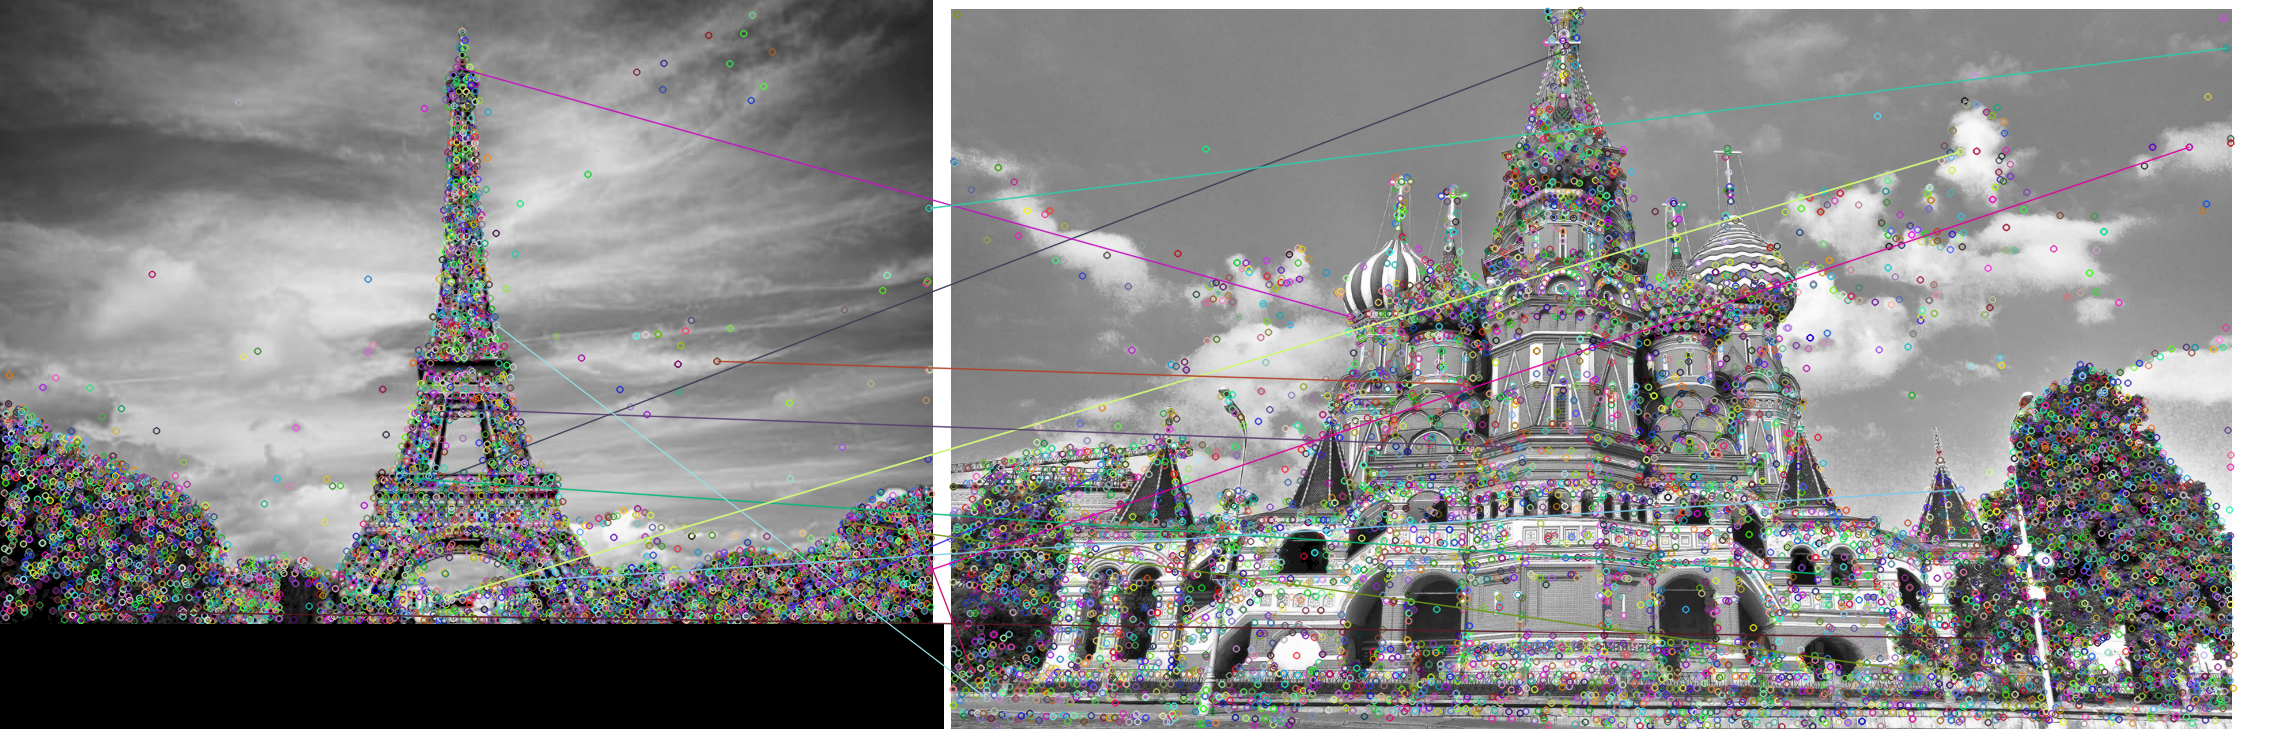

In [4]:
# ==============================
# Activity 3: SIFT Matching
# ==============================

!pip install opencv-python-headless -q

import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload 2 images
uploaded = files.upload()
file_names = list(uploaded.keys())

img1 = cv2.imread(file_names[0], 0)
img2 = cv2.imread(file_names[1], 0)

# SIFT
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Matching
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Ratio Test
good = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

print("Number of Matches:", len(good))

# Show
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good[:30], None)
cv2_imshow(matched_img)


Saving sample.jpg.png to sample.jpg.png


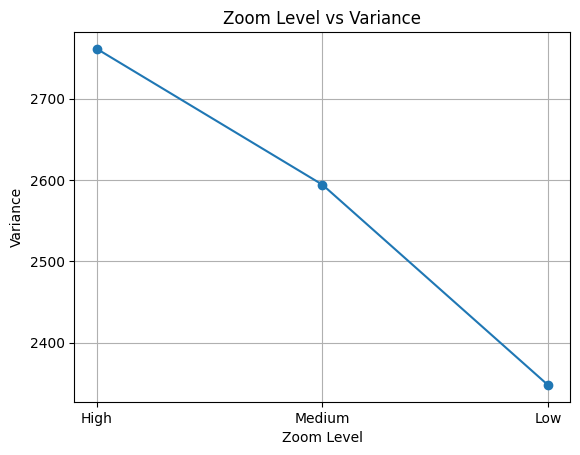

Variance values: [np.float64(2760.8966007717413), np.float64(2594.143796096764), np.float64(2348.2189379802853)]


In [5]:
# ==============================
# Activity 4: Variance Analysis
# ==============================

!pip install opencv-python-headless matplotlib -q

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Resolutions
high = img
medium = cv2.pyrDown(high)
low = cv2.pyrDown(medium)

images = [high, medium, low]
labels = ["High", "Medium", "Low"]

variances = []

for im in images:
    variances.append(np.var(im.flatten()))

# Graph
plt.plot(labels, variances, marker='o')
plt.xlabel("Zoom Level")
plt.ylabel("Variance")
plt.title("Zoom Level vs Variance")
plt.grid()
plt.show()

print("Variance values:", variances)
